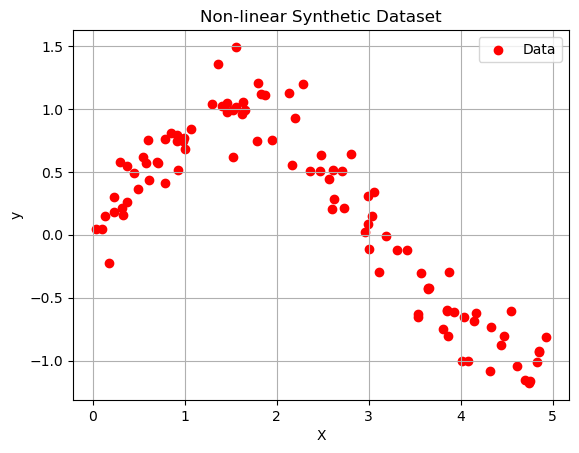

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Create synthetic nonlinear dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Visualize the data
plt.scatter(X, y, color='red', label='Data')
plt.title("Non-linear Synthetic Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


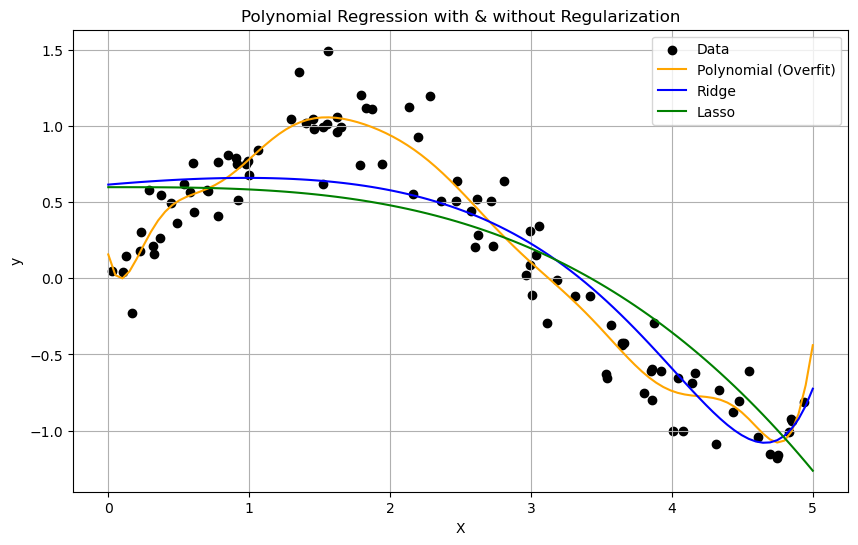

In [8]:
from sklearn.preprocessing import StandardScaler

# Degree
degree = 15

# Base Polynomial (no reg)
poly_model = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    LinearRegression()
)
poly_model.fit(X, y)

# Ridge Polynomial
ridge_model = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    Ridge(alpha=10.0)
)
ridge_model.fit(X, y)

# Lasso Polynomial
lasso_model = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    Lasso(alpha=0.1, max_iter=20000)
)
lasso_model.fit(X, y)

# Predict on smooth X values
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_poly = poly_model.predict(X_plot)
y_ridge = ridge_model.predict(X_plot)
y_lasso = lasso_model.predict(X_plot)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_plot, y_poly, label='Polynomial (Overfit)', color='orange')
plt.plot(X_plot, y_ridge, label='Ridge', color='blue')
plt.plot(X_plot, y_lasso, label='Lasso', color='green')
plt.title("Polynomial Regression with & without Regularization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
